In [51]:
from preprocess import *
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LSTM
from keras.utils import to_categorical
import wandb
from wandb.keras import WandbCallback
import matplotlib.pyplot as plt

In [26]:
wandb.init()
config = wandb.config

config.max_len = 11
config.buckets = 20

# Save data to array file first
save_data_to_array(max_len=config.max_len, n_mfcc=config.buckets)

labels=["bed", "happy", "cat"]

Saving vectors of label - 'bed':   0%|          | 0/1713 [00:00<?, ?it/s]

W&B Run: https://app.wandb.ai/l2k2/ml-class-videos_cnn-audio/runs/n5fqsruy
Call `%%wandb` in the cell containing your training loop to display live results.


Saving vectors of label - 'cat': 100%|██████████| 1733/1733 [00:13<00:00, 131.24it/s]


In [5]:
# # Loading train set and test set
X_train, X_test, y_train, y_test = get_train_test()

In [32]:
# # Feature dimension
channels = 1
config.epochs = 50
config.batch_size = 100

num_classes = 3

X_train = X_train.reshape(X_train.shape[0], config.buckets, config.max_len, channels)
X_test = X_test.reshape(X_test.shape[0], config.buckets, config.max_len, channels)

0.0


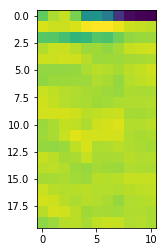

In [37]:
plt.imshow(X_train[100, :, :, 0])
print(y_train[100])

In [29]:
y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)

In [54]:

X_train = X_train.reshape(X_train.shape[0], config.buckets, config.max_len)
X_test = X_test.reshape(X_test.shape[0], config.buckets, config.max_len)

model = Sequential()
model.add(Flatten(input_shape=(config.buckets, config.max_len)))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])

In [55]:
wandb.init()
model.fit(X_train, y_train_hot, epochs=config.epochs, validation_data=(X_test, y_test_hot), callbacks=[WandbCallback(data_type="image", labels=labels)])

W&B Run: https://app.wandb.ai/l2k2/ml-class-videos_cnn-audio/runs/uaom4fuw
Call `%%wandb` in the cell containing your training loop to display live results.
Train on 3112 samples, validate on 2076 samples
Epoch 1/50
3112/3112 [==============================] - 1s 252us/step - loss: 9.6424 - acc: 0.3817 - val_loss: 8.9929 - val_acc: 0.4253
Epoch 2/50
3112/3112 [==============================] - 0s 149us/step - loss: 8.8110 - acc: 0.4341 - val_loss: 8.2306 - val_acc: 0.4653
Epoch 3/50
3112/3112 [==============================] - 0s 152us/step - loss: 7.8625 - acc: 0.4820 - val_loss: 6.7555 - val_acc: 0.5313
Epoch 4/50
3112/3112 [==============================] - 0s 150us/step - loss: 5.1861 - acc: 0.6144 - val_loss: 4.2210 - val_acc: 0.6696
Epoch 5/50
3112/3112 [==============================] - 0s 144us/step - loss: 3.5821 - acc: 0.7208 - val_loss: 3.6203 - val_acc: 0.7163
Epoch 6/50
3112/3112 [==============================] - 1s 213us/step - loss: 2.9745 - acc: 0.7561 - val_loss: 3.26

In [53]:

# build model
model = Sequential()
model.add(LSTM(16, input_shape=(config.buckets, config.max_len, channels), activation="sigmoid"))
model.add(Dense(1, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

ValueError: Input 0 is incompatible with layer lstm_2: expected ndim=3, found ndim=4

In [48]:
model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])

In [49]:
wandb.init()
model.fit(X_train, y_train_hot, epochs=config.epochs, validation_data=(X_test, y_test_hot), callbacks=[WandbCallback(data_type="image", labels=labels)])

W&B Run: https://app.wandb.ai/l2k2/ml-class-videos_cnn-audio/runs/dtwf65g1
Call `%%wandb` in the cell containing your training loop to display live results.
Train on 3112 samples, validate on 2076 samples
Epoch 1/50
3112/3112 [==============================] - 1s 407us/step - loss: 1.9623 - acc: 0.4762 - val_loss: 0.7156 - val_acc: 0.6946
Epoch 2/50
3112/3112 [==============================] - 1s 241us/step - loss: 0.7342 - acc: 0.6655 - val_loss: 0.5495 - val_acc: 0.7905
Epoch 3/50
3112/3112 [==============================] - 1s 236us/step - loss: 0.6346 - acc: 0.7265 - val_loss: 0.4503 - val_acc: 0.8295
Epoch 4/50
3112/3112 [==============================] - 1s 238us/step - loss: 0.5327 - acc: 0.7847 - val_loss: 0.3875 - val_acc: 0.8521
Epoch 5/50
3112/3112 [==============================] - 1s 225us/step - loss: 0.4546 - acc: 0.8194 - val_loss: 0.3664 - val_acc: 0.8545
Epoch 6/50
3112/3112 [==============================] - 1s 229us/step - loss: 0.4234 - acc: 0.8316 - val_loss: 0.33